# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Setting the style for plots 
plt.style.use('ggplot')

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
# Since the dataset is huge, we are importing only 100000 rows of the csv file, in order to be able to work in my computer 
transactions = pd.read_csv('NTNU_data.csv', nrows= 100000)

In [3]:
# Taking a look at how the df looks like 
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Assessing how the data looks like, calculating some statistics. 
transactions.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [5]:
# Checking the shape of the df. Please note that we are not importing the entire dataset, just some rows.
transactions.shape

(100000, 11)

### What is the distribution of the outcome? 

(0, 110000)

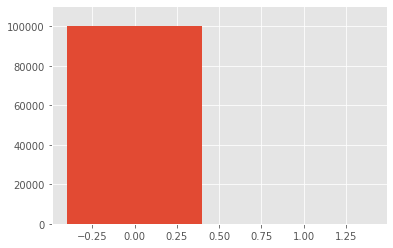

In [6]:
# Plotting the distribution of the outcome. We have considered as an outcome the column 'isFraud'
plt.bar(x=[0,1], height=transactions['isFraud'].value_counts())
plt.ylim(0,110000)

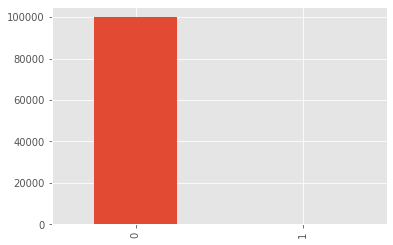

In [7]:
# Plotting the distribution plot in a different way to have a better look at the bins. 
transactions['isFraud'].value_counts().plot(kind='bar')

In [8]:
# Calculating how many observations we have in each possible outcome. 
transactions['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

According to the outcome that we can have, that is 0 or 1, we can say that this is a Poisson or Binomial distribution. 

In [9]:
# Calculating the different values when we import more rows. 
transactions['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [10]:
# Checking the types of our variables in the df. 
transactions.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

According to the variables we have, the types are correct. 

`Description of the columns`

**step** → Maps a unit of time in the real world. In this case 1 step is 1 hour of time. There is a total amount of 744 steps, that mean that there is a 30-days simulation 

**type**→ CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER

**amount** → amount of the transaction in local currency

**nameOrig** → customer who started the transaction

**oldbalanceOrg** → initial balance before the transaction

**newbalanceOrig** → customer's balance after the transaction.

**nameDest** → recipient ID of the transaction.

**oldbalanceDest**→ initial recipient balance before the transaction.

**newbalanceDest**→ recipient's balance after the transaction.

**isFraud** → identifies a fraudulent transaction (1) and non fraudulent (0)

**isFlaggedFraud** → flags illegal attempts to transfer more than 200.000 in a single transaction. 


The column `isFlaggedFraud` is not a descriptive variable and is not an outcome. Hence, we will remove it from the dataset. 

In [11]:
# Dropping `isFlaggedFraud` column from the dataframe. 
transactions.drop(columns=['isFlaggedFraud'], inplace=True)

In [12]:
# Checking the amount of missing values
transactions.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In this case, we don't have missing value, so there's no need to clean the dataset.

`steps variable`

I think that the steps column, as it is right now is not useful at all. I would have used a timestamp or a datetime object. In this case this column is not useful fos us, and for this reason we will drop the column.

In [13]:
# Droping step column 
transactions.drop('step', axis= 1, inplace= True)

Regarding the other columns, we have 3 different columns that are considered as object, these columns are: 

**type**

**NameOrig**

**NameDest**

If we don't convert these categories into dummy variables by encoding them, we cannot implement a logistic regression. In the cells below we are checking the categories we have in these columns. 

In [14]:
# Calculating how many labels and values we have at each label in 'nameOrig'
transactions['nameOrig'].value_counts()

C1143482755    1
C203816488     1
C1620400620    1
C41764312      1
C1543953189    1
C601229281     1
C786609480     1
C715801972     1
C1841503483    1
C1432355636    1
C1715981304    1
C1375674743    1
C502809770     1
C1482674311    1
C1366860402    1
C1676079076    1
C1947941827    1
C1045889998    1
C1443901239    1
C581551491     1
C123339606     1
C1923019168    1
C1497082681    1
C1449757327    1
C674995460     1
C187678171     1
C1600163126    1
C1067347707    1
C1124338128    1
C883670413     1
              ..
C6467556       1
C596084504     1
C1150504930    1
C1837637612    1
C287336771     1
C1617156106    1
C2040080922    1
C622598982     1
C1410237279    1
C381215857     1
C625416245     1
C1226493348    1
C2111384118    1
C1245995978    1
C559670925     1
C1151392646    1
C1563044524    1
C1587151680    1
C150330556     1
C708363862     1
C749863123     1
C1821844934    1
C1590075830    1
C296868206     1
C581072278     1
C532422090     1
C1007955511    1
C1306260099   

In [15]:
# Calculating how many labels and values we have at each label in 'nameDest'
transactions['nameDest'].value_counts()

C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
C977993101     65
C665576141     65
C1360767589    62
C451111351     60
C1023714065    57
C1899073220    57
C1782113663    57
C97730845      57
C1816757085    55
C306206744     55
C716083600     55
C667346055     54
C1234776885    53
C453211571     52
C1883840933    50
C1789550256    49
C33524623      48
C1262822392    48
C392292416     48
C932583850     48
C1721246982    46
C909295153     46
C11003494      46
C1504109395    46
C481402298     45
               ..
M1044200656     1
M533779930      1
M2063401953     1
M1151515099     1
M1831961195     1
M962044589      1
M327654471      1
M763547141      1
M385973117      1
C1324341882     1
M378845707      1
M600045899      1
C691751922      1
M103011325      1
M267804101      1
M341874065      1
M297648083      1
M896475319      1
M1923340769     1
M225985274      1
M357183868      1
M1502360147     1
M419661764      1
M1282496452     1
M161952988

In [16]:
# Calculating how many labels and values we have at each label in 'Type'
transactions['type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

The only column where it makes sense to have is the `Type` one, since there are categories where we can currently encode them. 

In the other cases, nameOrig and nameDest, we have a huge amount of labels that cannot currently be encoded. For this reason, the best is to drop these columns. 

In [17]:
# Droping nameOrig and nameDest columns. 
transactions.drop(columns=['nameOrig', 'nameDest'], inplace=True)

We will encode the column `Type` to be able to perform a logistic regression. 

In [18]:
# Implementing get_dummies method to encode the categorical variable 'Type'
transactions_dummies = pd.get_dummies(transactions, columns = ['type'], drop_first=True)

In [19]:
# Taking a look at the encoding
transactions_dummies.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Splitting into X and y 

In [20]:
# Selecting data that are our features and the target variables.
y = transactions_dummies[['isFraud']]
X = transactions_dummies.drop(columns=['isFraud'])

### Splitting intro train and test

In [21]:
# Importing sklearn library for model selection to split between train and test
from sklearn.model_selection import train_test_split

# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

### Run a logisitc regression classifier and evaluate its accuracy.

In [22]:
# Importing the library for a logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

# Creating an instance for the logistic regression specifying 
# the solver and multi_class for a better performance 
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')


# Fitting the logistic regression with X_train and y_train
logreg.fit(X_train, y_train)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Predicting the outcome based on X_test
y_pred = logreg.predict(X_test)

In [24]:
# Importing the required libraries to calculate the metrics of the ML models we are calculating 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Logistic regression
print(f"Confusion matrix = \n {confusion_matrix(y_test, y_pred)}")
print(f"precision score = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1 score = {f1_score(y_test, y_pred)}")
print(f"accuracy = {accuracy_score(y_test, y_pred)}")

Confusion matrix = 
 [[32946    17]
 [   11    26]]
precision score = 0.6046511627906976
recall = 0.7027027027027027
f1 score = 0.6499999999999999
accuracy = 0.9991515151515151


### Now pick a model of your choice and evaluate its accuracy.

#### Decision Tree

In [25]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Creating the instance of the Decision Tree with maximum depth equals to 1
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1, min_samples_leaf=5)

# Fitting the model on train set 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [26]:
# Predicting observation on our test set. 
y_pred_tree = dtree.predict(X_test)

In [27]:
# Calculating and printing the accuracy score between the y_test value and the y_predicted values. 
print(f"Accuracy is: {accuracy_score(y_test,y_pred_tree)}")

Accuracy is: 0.9988787878787879


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


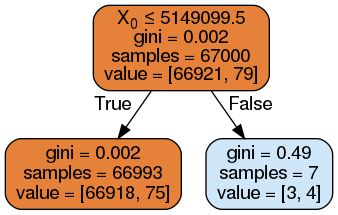

In [28]:
# Drawing the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### KNN Algorithm
https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

With KNN Algorithm we might need to normalize our data if they have different range. Let's take a look at the basics statistics to see if we need to normalize the data.

In [29]:
# Taking a look at some statistics to see if we need normalization 
transactions_dummies.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.307180,0.009880,0.395120,0.085970
std,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.461327,0.098906,0.488879,0.280321
min,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000,1.000000,1.000000,1.000000


According to the describe function, we can see that the ranges varies quite a lot from one column another. Also, when we want to work with KNN we cannot have categorical variables. Hence, we will remove categorical columns from our dataset.

In [32]:
# Droping the categorical and object columns
transactions_KNN = transactions_dummies.drop(columns=['isFraud', 'type_CASH_OUT', 'type_DEBIT',
                                                     'type_PAYMENT', 'type_TRANSFER'])
# Printing the head to see the corrected dataframe 
transactions_KNN.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0
3,181.00,181.0,0.00,21182.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0


##### Scaling Data for KNN 

In [38]:
# Importing libraries to Scale the data 
from sklearn.preprocessing import StandardScaler

# Creating the instance to scale the data
scaler = StandardScaler()

# Fitting the data 
scaler.fit(transactions_KNN)

# Transforming the dataframe according to the scale we have fit before
transactions_scaled = scaler.transform(transactions_KNN)
# Creating a dataframe with the scaled data. 
transactions_scaled = pd.DataFrame(transactions_scaled)

In [39]:
transactions_scaled.head()

,0,1,2,3,4
0,-0.475641,-0.264702,-0.270632,-0.366533,-0.422519
1,-0.498805,-0.320397,-0.322604,-0.366533,-0.422519
2,-0.503694,-0.328278,-0.329753,-0.366533,-0.422519
3,-0.503694,-0.328278,-0.329753,-0.357715,-0.422519
4,-0.470330,-0.312802,-0.318731,-0.366533,-0.422519


##### KNN Model

In [43]:
# Importing the library to implement a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier

# Splitting data into train and test
X_train_scaled, X_test_scaled, y_train_KNN, y_test_KNN = train_test_split(transactions_scaled, y, test_size=0.20, random_state=12)

# Creating the instance
knn_model = KNeighborsClassifier(n_neighbors=4)

# Fitting the model on our train dataset 
knn_model.fit(X_train_scaled, y_train_KNN)


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [44]:
# Predicting some features on our test dataset 
knn_model.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
# Calculating the knn score
knn_model.score(X_test_scaled, y_test_KNN)

0.9988

### Which model worked better and how do you know?

The accuracy of all three models is quite good, but I can better understand the Logistic Regression classifier. But, only taking care of the accuracy, all three models perform similar. 

However, with the confusion matrix we can take a deeper look at the results and see the performance of the model. The TP value is quite high compared to others. 

However, for example the score of the KNN model for the test set is nearly 100% 